# Person wage class

# EDA

In [2]:
import numpy as np
import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels


In [3]:
train_set.to_csv('train_data.csv',index=False)
test_set.to_csv('test_data.csv',index=False)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# EDA
- Missing values.
- Categorical variables
- Numerical variables
- Outliers
- Temporal variables

## EDA - Train data

In [5]:
data_frame=train_set.copy()

In [6]:
#Missing data.
data_frame.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

There are no missing values in the data.

### Categorical variables.

In [7]:
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)

In [8]:
data_frame[categorical_features].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
#checking the cardinality for the categorical features.
for cols in categorical_features:
    print(cols,' has ',len(data_frame[cols].unique()),' unique features')

workclass  has  9  unique features
education  has  16  unique features
marital_status  has  7  unique features
occupation  has  15  unique features
relationship  has  6  unique features
race  has  5  unique features
sex  has  2  unique features
native_country  has  42  unique features
wage_class  has  2  unique features


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

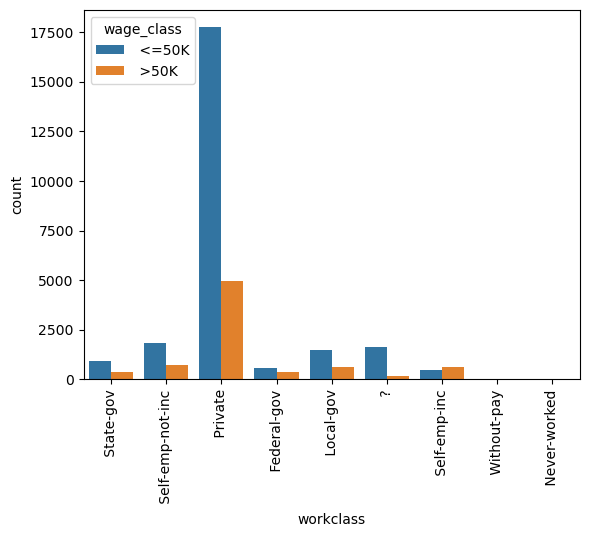

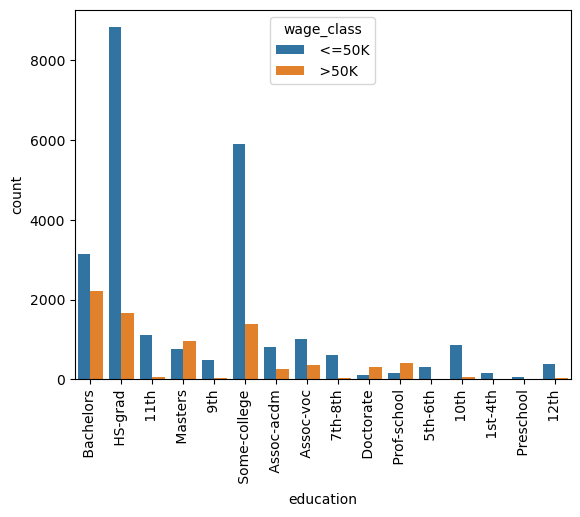

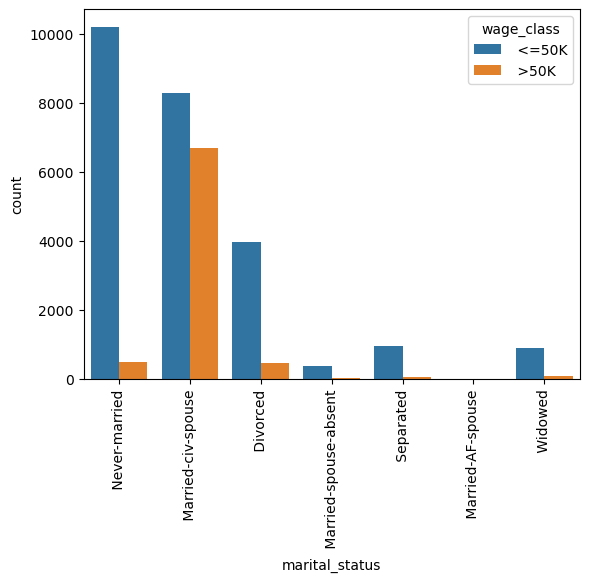

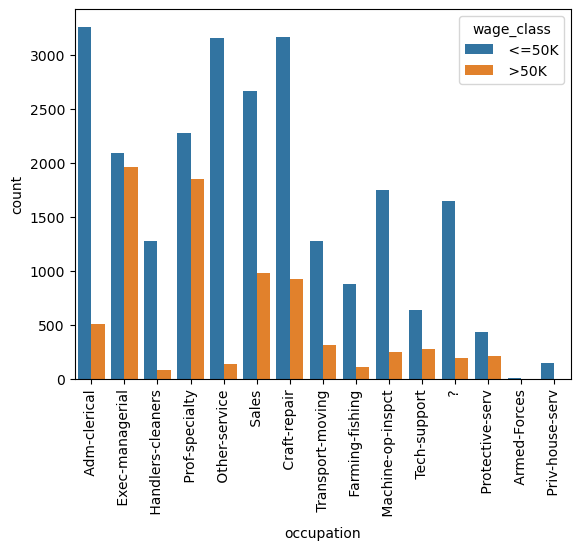

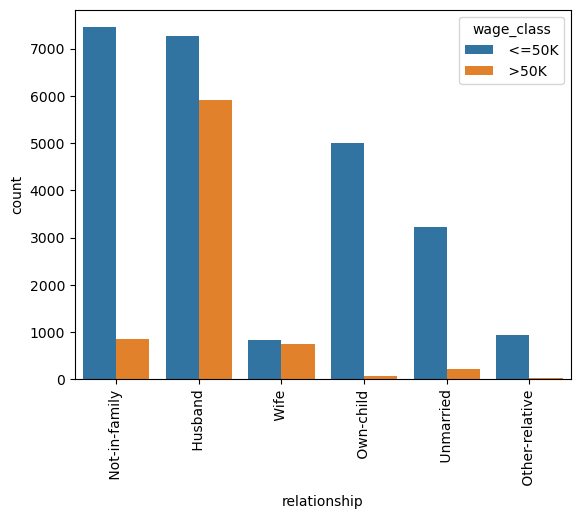

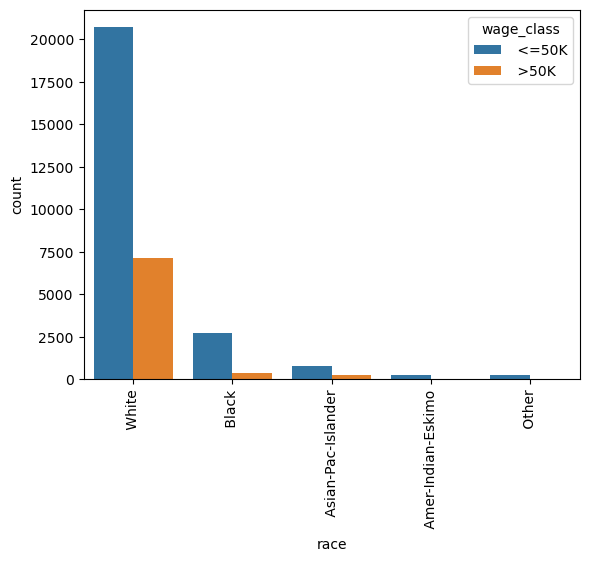

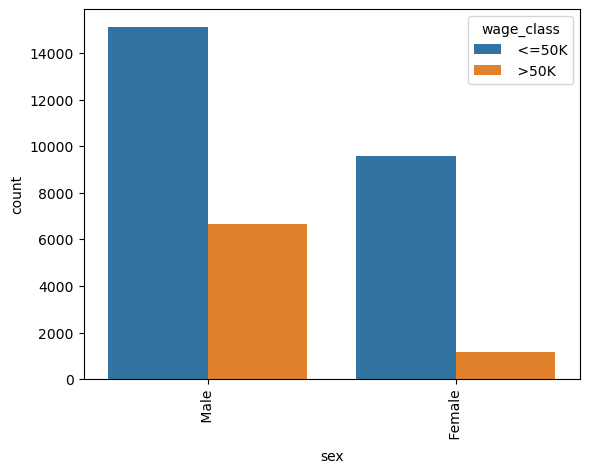

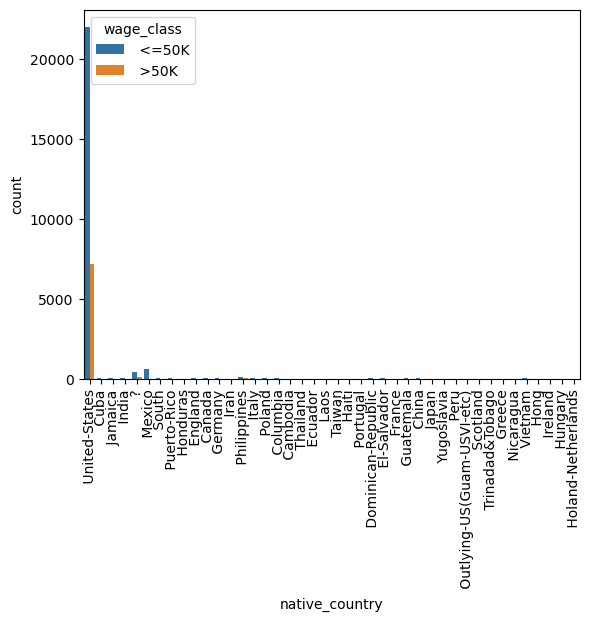

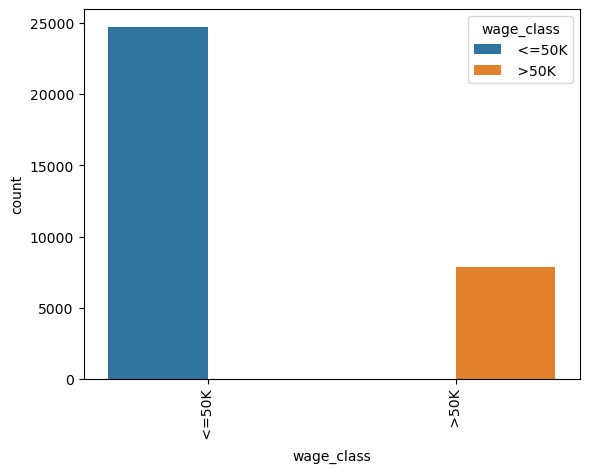

In [11]:
for cols in categorical_features:
    sns.countplot(data_frame[cols],hue=data_frame['wage_class'])
    plt.xticks(rotation=90)
    plt.show()

### Numerical features

In [12]:
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        numerical_features.append(cols)

In [13]:
data_frame[numerical_features].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [14]:
#getting the discrete and continuos features.
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continuos_features.append(cols)
    else:
        discrete_features.append(cols)

In [15]:
data_frame[discrete_features].head()

,education_num
0,13
1,13
2,9
3,7
4,13


In [16]:
data_frame[continuos_features].head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40


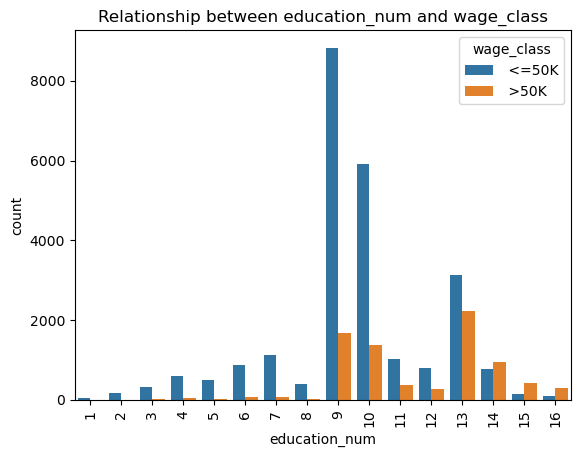

In [17]:
#plotting for discreting features.
for cols in discrete_features:
    plt.title('Relationship between '+cols+' and wage_class')
    sns.countplot(data_frame[cols],hue=data_frame['wage_class'])
    plt.xticks(rotation=90)
    plt.show()

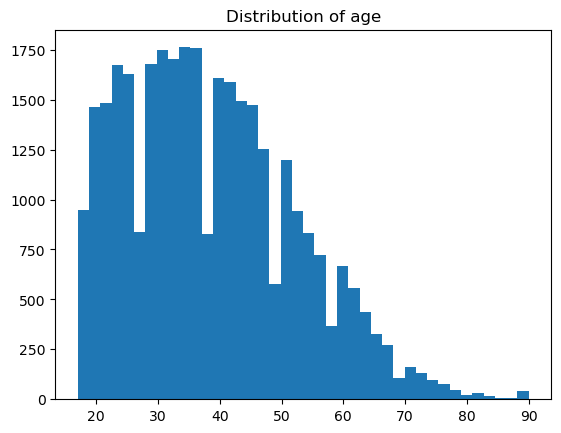

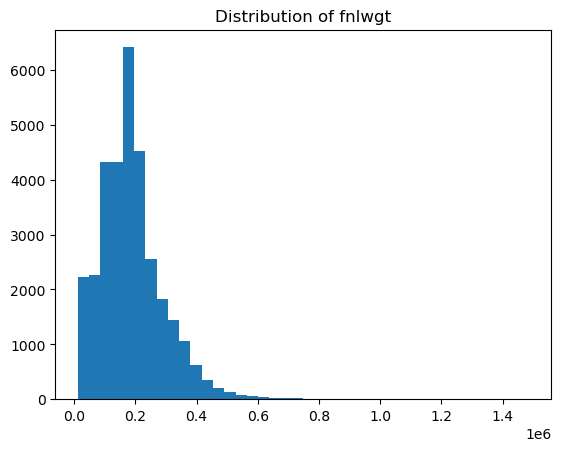

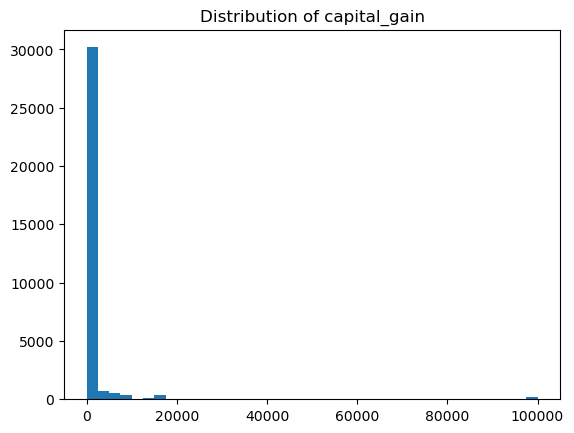

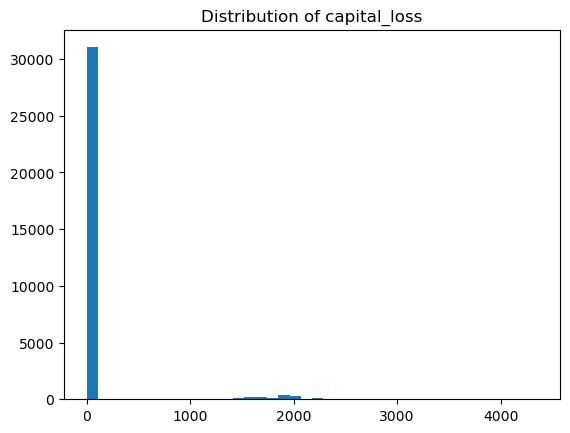

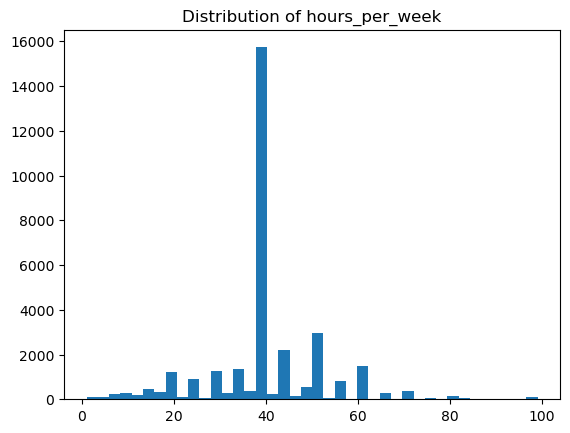

In [18]:
#relationship between the continuos_features and output feature.
for cols in continuos_features:
    plt.title('Distribution of '+cols)
    plt.hist(data_frame[cols],bins=40)
    plt.show()

There is no distribution in data among the continuos features.

In [19]:
for cols in continuos_features:
    data=data_frame.copy()
    if 0 not in data[cols].unique():
        plt.title(cols)
        data[cols]=np.log(data[cols])
        plt.hist(data[cols],bins=40)

We cannot convert the values in continuos features to log values because there is 0 included in the features.

### Outliers(in Continuos features)

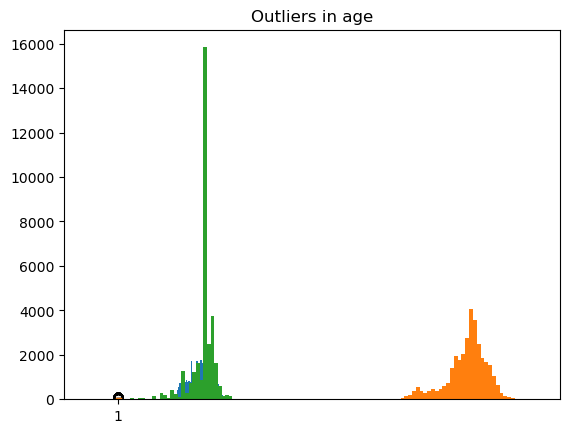

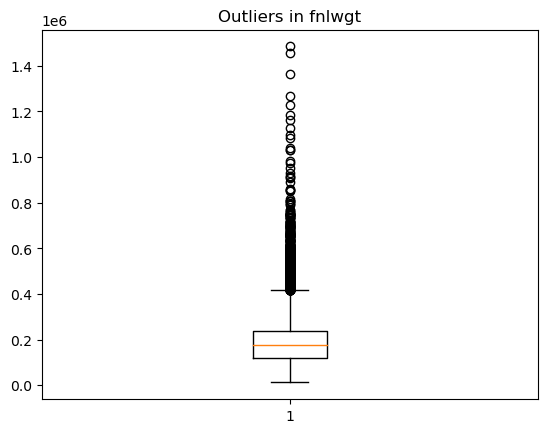

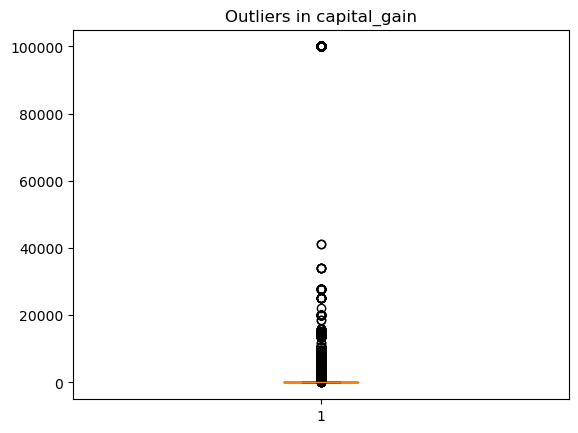

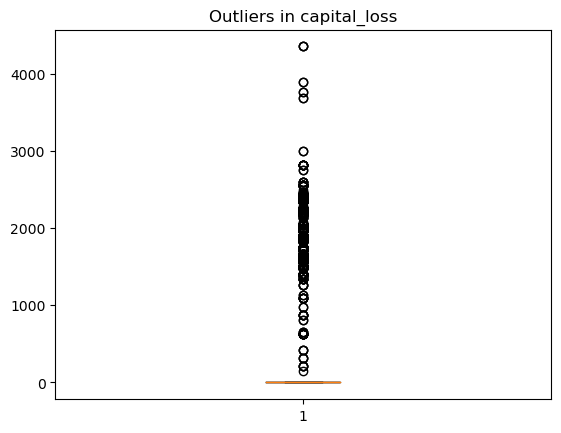

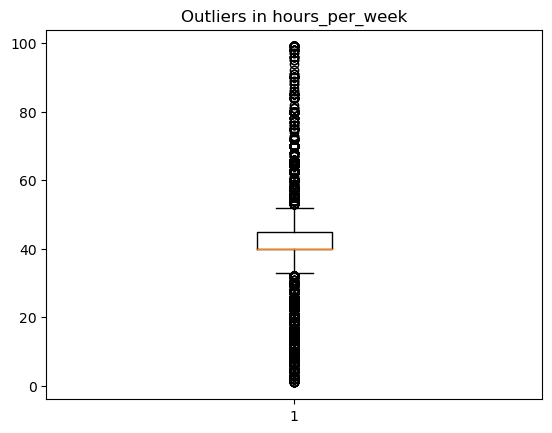

In [20]:
for cols in continuos_features:
    plt.title('Outliers in '+cols)
    plt.boxplot(data_frame[cols])
    plt.show()

### Temporal variables.

There are no temporal variables in the data.

In [21]:
#saving the csv data file from api to local machine.
data_frame.to_csv('train_data.csv',index=False)

## EDA - Test data

In [24]:
data_frame=test_set.copy()

In [25]:
data_frame.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Missing values

In [26]:
data_frame.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

There are no null values in the data

### Categorical features

In [28]:
#finding the cardinality of the categorical features.
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        print(cols,' has ',len(data_frame[cols].unique()),' unique features')
        categorical_features.append(cols)

workclass  has  9  unique features
education  has  16  unique features
marital_status  has  7  unique features
occupation  has  15  unique features
relationship  has  6  unique features
race  has  5  unique features
sex  has  2  unique features
native_country  has  41  unique features
wage_class  has  2  unique features


In [29]:
data_frame[categorical_features].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K.
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K.
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K.
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K.
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K.


In [31]:
for cols in categorical_features:
    print('unique features of ',cols,' are: ',data_frame[cols].unique())
    print('')

unique features of  workclass  are:  [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']

unique features of  education  are:  [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']

unique features of  marital_status  are:  [' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']

unique features of  occupation  are:  [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']

unique features of  relationship  are:  [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']

unique features of  race

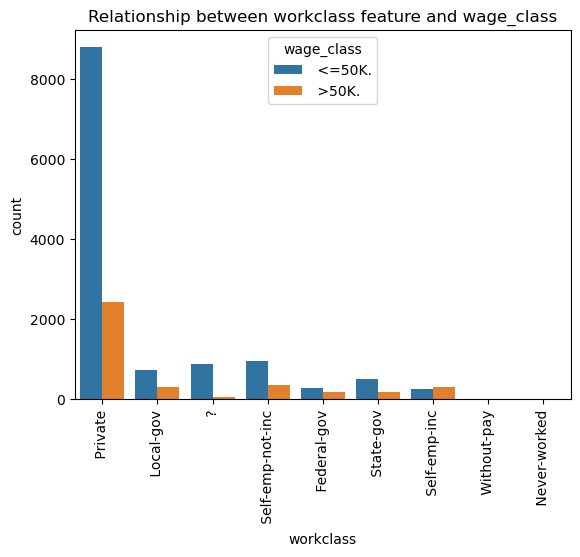

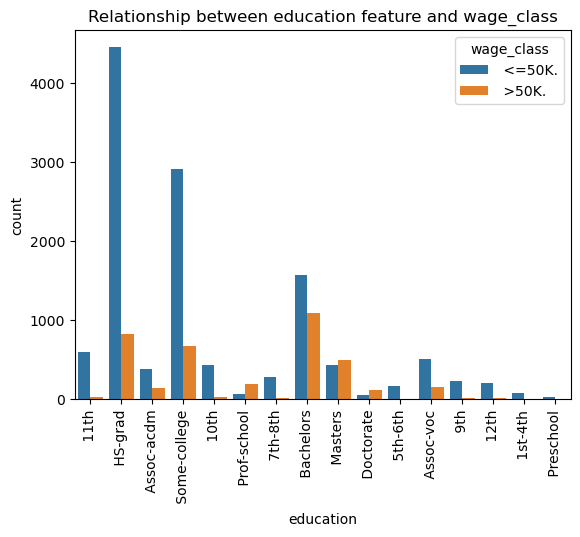

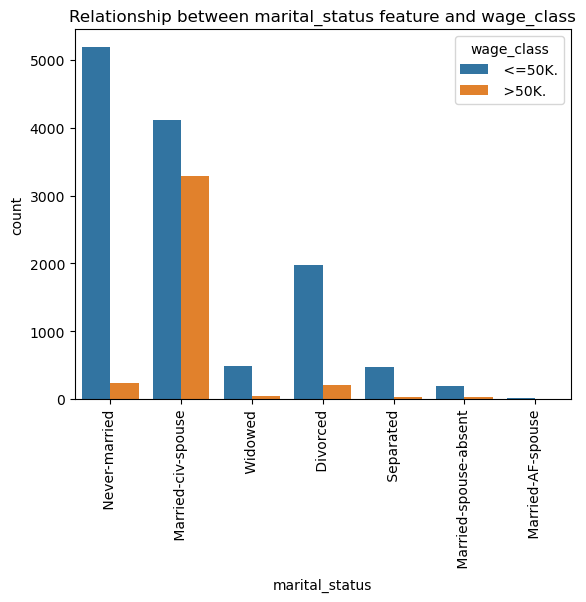

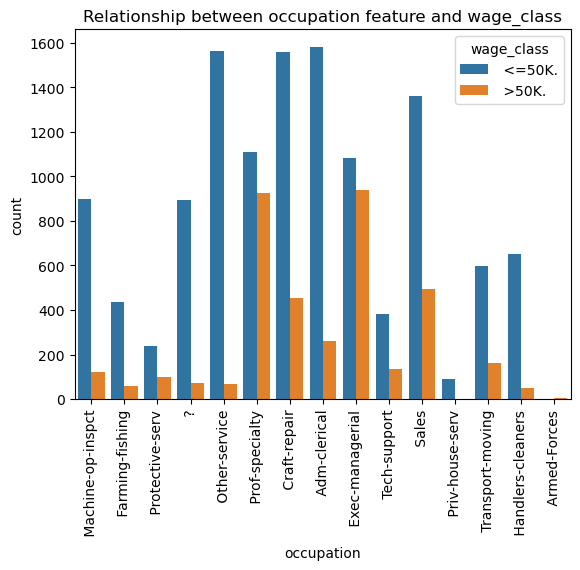

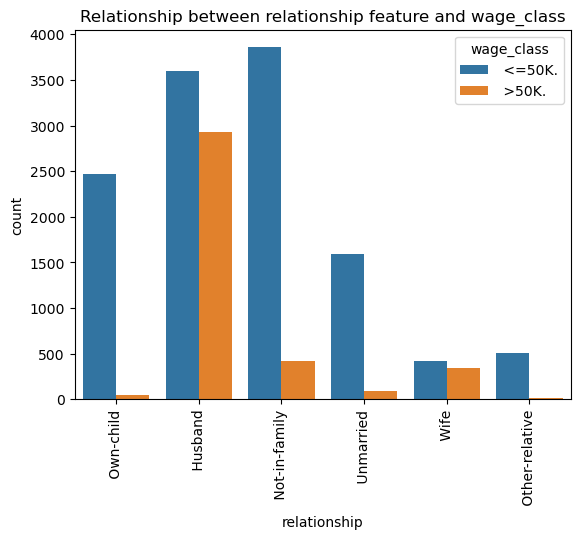

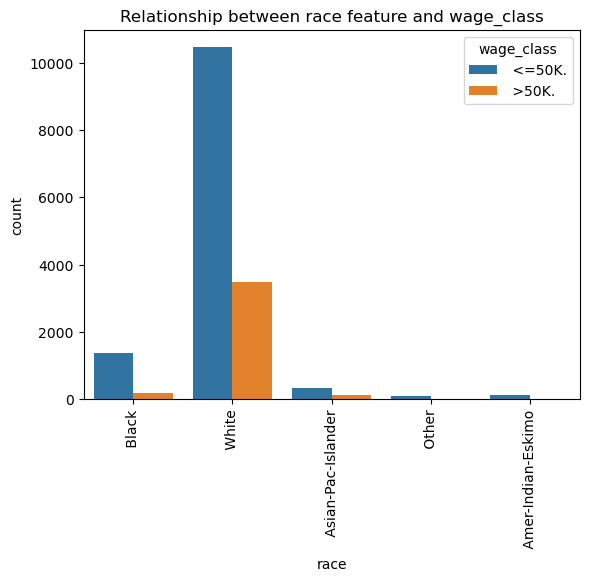

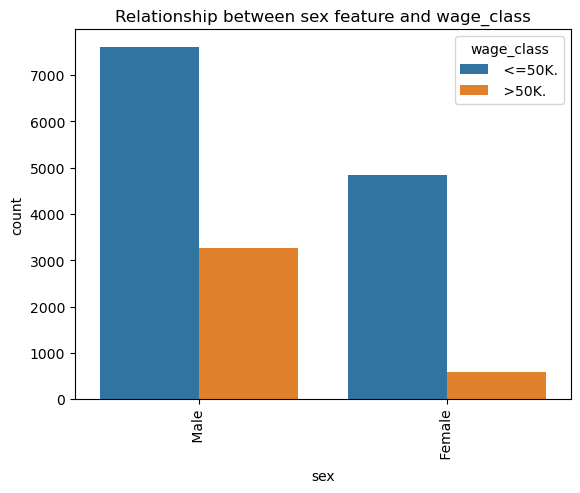

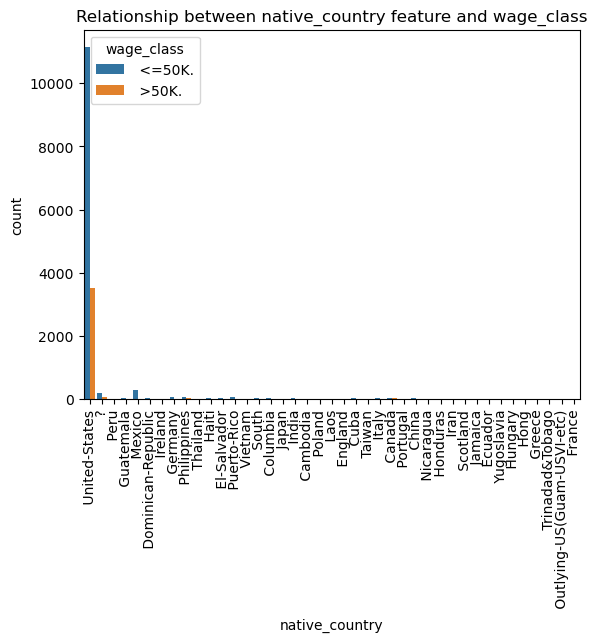

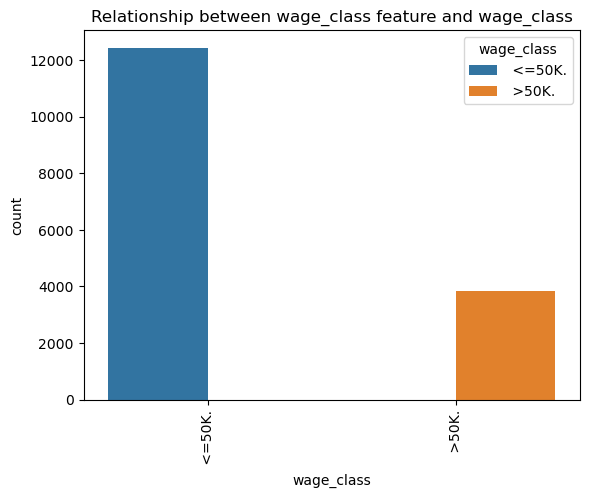

In [35]:
#relationship between the output feature and categorical_features.
for cols in categorical_features:
    plt.title('Relationship between '+cols+' feature and wage_class')
    sns.countplot(data_frame[cols],hue=data_frame['wage_class'])
    plt.xticks(rotation=90)
    plt.show()

### Numerical features

In [38]:
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        numerical_features.append(cols)

In [39]:
data_frame[numerical_features].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [40]:
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continuos_features.append(cols)
    else:
        discrete_features.append(cols)

In [41]:
data_frame[discrete_features].head()

,education_num
0,7
1,9
2,12
3,10
4,10


In [42]:
data_frame[continuos_features].head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,25,226802,0,0,40
1,38,89814,0,0,50
2,28,336951,0,0,40
3,44,160323,7688,0,40
4,18,103497,0,0,30


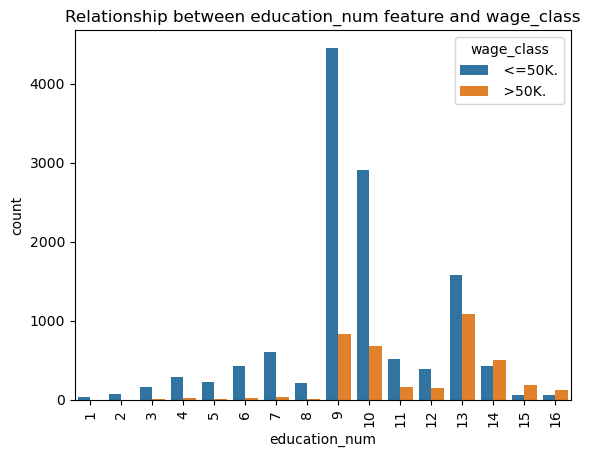

In [44]:
#relationship between discrete features and class_wage feature.
for cols in discrete_features:
    sns.countplot(data_frame[cols],hue=data_frame['wage_class'])
    plt.title('Relationship between '+cols+' feature and wage_class')
    plt.xticks(rotation=90)
    plt.show()

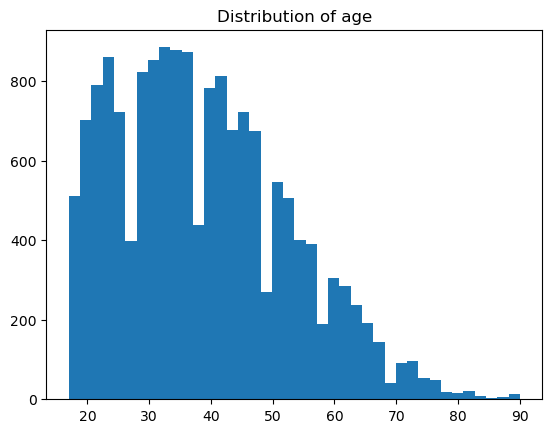

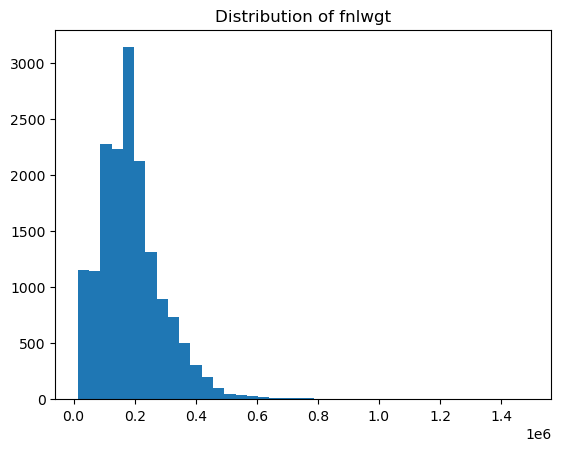

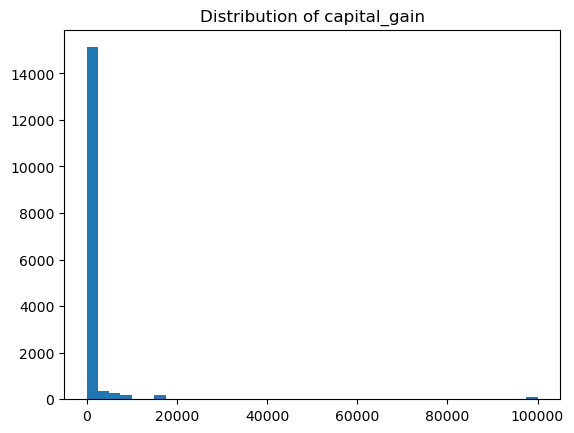

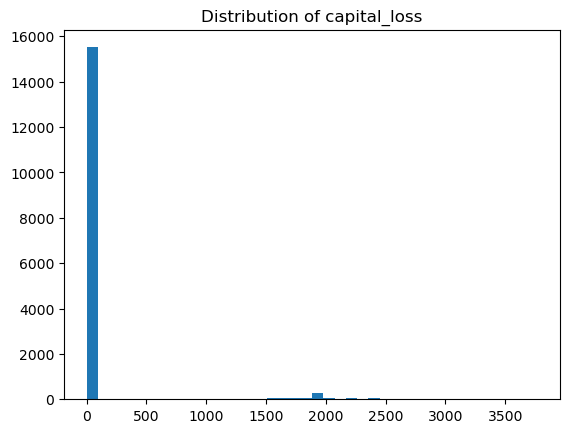

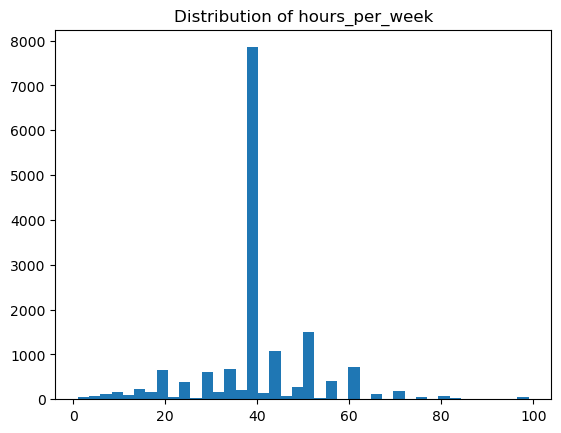

In [62]:
#plotting continous_features by finding the distribution of the data.
for cols in continuos_features:
    plt.title('Distribution of '+cols)
    plt.hist(data_frame[cols],bins=40)
    plt.show()

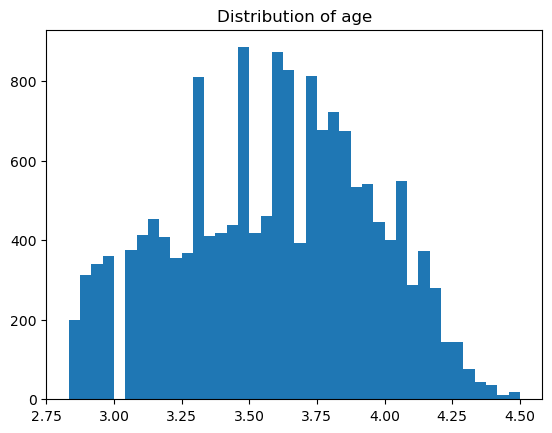

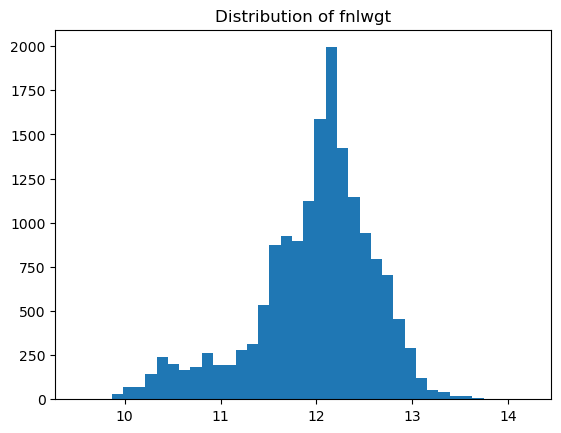

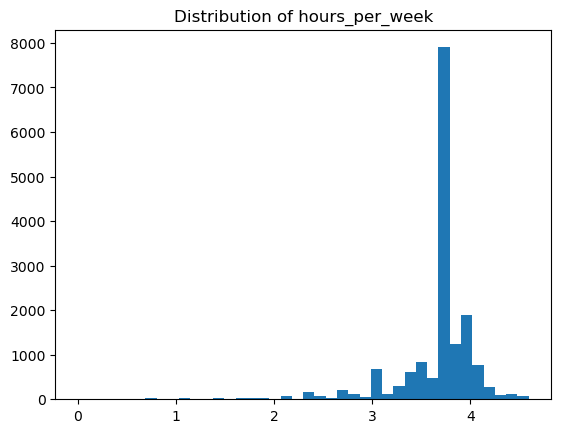

In [61]:
#distribution of continuos data after performing log function.
for cols in continuos_features:
    data=data_frame.copy()
    if 0 not in data_frame[cols].unique():
        data[cols]=np.log(data[cols])
        plt.title('Distribution of '+cols)
        plt.hist(data[cols],bins=40)
        plt.show()

### Outliers

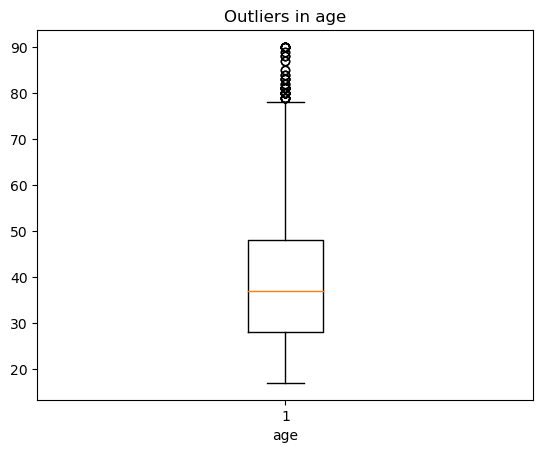

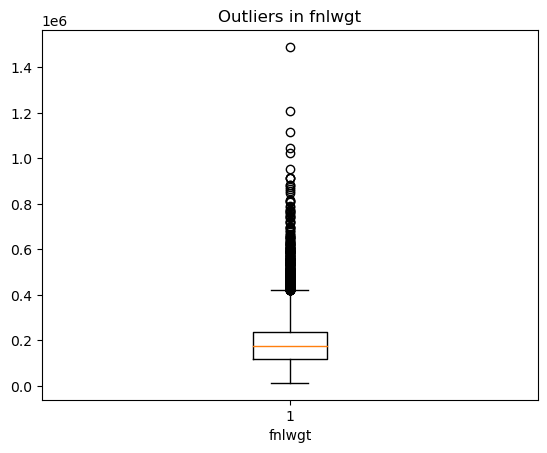

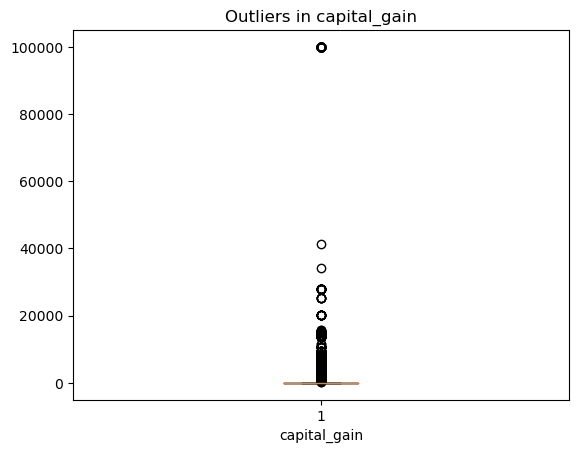

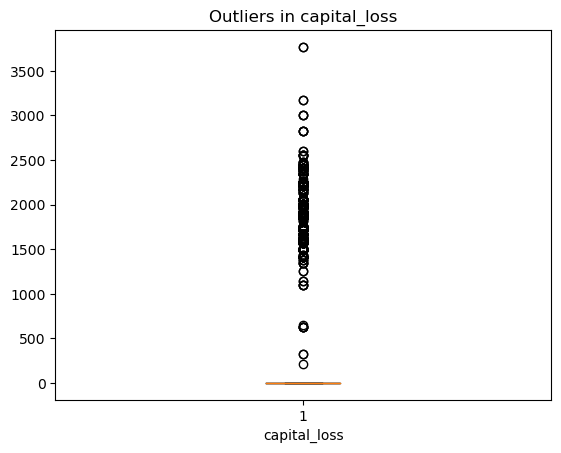

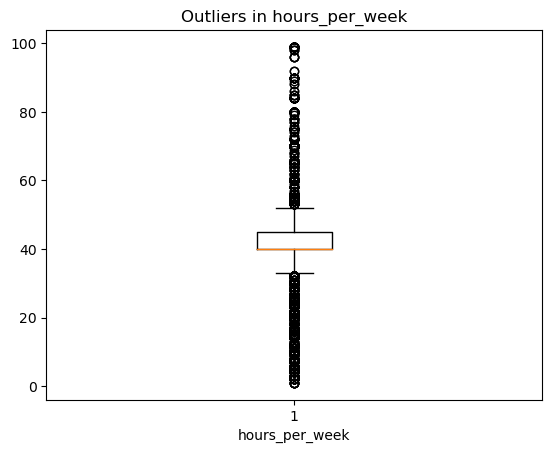

In [66]:
for cols in continuos_features:
    plt.title('Outliers in '+cols)
    plt.boxplot(data_frame[cols])
    plt.xlabel(cols)
    plt.show()

### Temporal features

There are no temporal features to show

In [67]:
#saving the test data from api to local machine

In [68]:
data_frame.to_csv('test_data.csv',index=False)